<strong>Step 1 : Import Library</strong>
<br>Import library-library python yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

<strong>Step 2 : Load Data</strong>
<br>Load data dari file csv ke pandas data frame. Dan Melakukan analisa awal data.

In [ ]:
df1 = pd.read_csv('train_fintech.csv', sep=';')
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<strong>Step 3 : Visualisasi Data</strong>
<br>Untuk kebutuhan analisa data

<img src="https://github.com/anugrahfitra/fin_6/blob/main/img/vis1.png?raw=1">

<img src="https://github.com/anugrahfitra/fin_6/blob/main/img/vis2.png?raw=1">

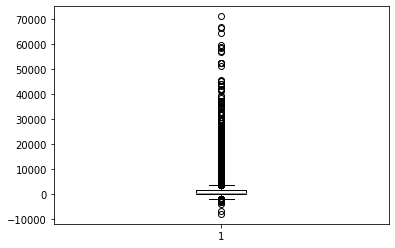

In [ ]:
#Melihat sebaran data untuk variable/kolom/feature Penghasilan
plt.boxplot(df1['balance'])
plt.show()

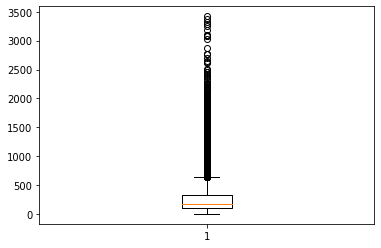

In [ ]:
#Melihat sebaran data untuk variable/kolom/feature Penghasilan
plt.boxplot(df1['duration'])
plt.show()

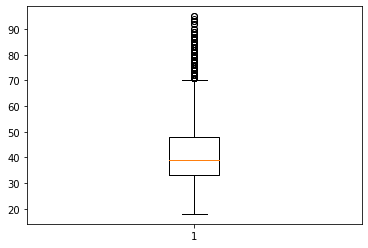

In [ ]:
plt.boxplot(df1['age'])
plt.show()

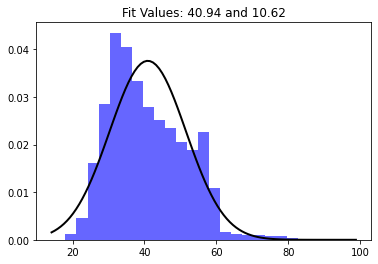

In [ ]:
mu, std = norm.fit(df1['age']) 
plt.hist(df1['age'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

<strong>Step 4 : Data Preparation (Cleansing)</strong>
<br>1. Hilangkan pencilan di Balance dg di replace dg nilai Median-nya
<br>2. Hilangkan pencilan di Duration dg di replace dg nilai Median-nya
<br>3. Hilangkan job yang 'unknown'

In [ ]:
#Replace pencilan balance
nilai_median = df1['balance'].median()
df1.loc[df1['balance'] >= 75000, 'balance'] = nilai_median
df1[df1['balance'] >= 100].count()['balance']

32774

In [ ]:
#Replace pencilan duration
nilai_median = df1['duration'].median()
df1.loc[df1['duration'] >= 3500, 'duration'] = nilai_median
df1[df1['duration'] >= 100].count()['duration']

34487

In [ ]:
#drop job unknown
where_clause = df1.job == 'unknown'
df1.drop(df1[where_clause].index, axis = 0, inplace = False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
